In [1]:
import numpy as np
import cv2
from PIL import Image

In [2]:
def showImg(img):
    pil_image=Image.fromarray(np.uint8(img))
    pil_image.show()

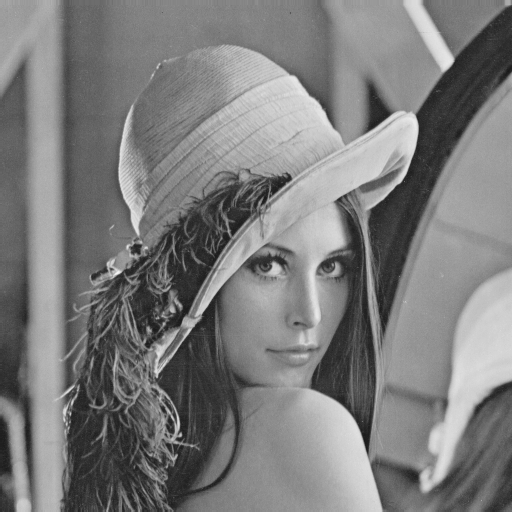

In [3]:
path = 'data/lena_gray.png'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Could not read image from path: " + path)

showImg(img)

In [4]:
def computeGaussianPyramid(img, l: int):
    """
    Computes and returns the Gaussian Pyramid of 'l' levels from image 'img'.
    :param img: Image.
    :param l: Number of levels.
    :return: Gaussian Pyramid.
    """
    G = img.copy()
    gpImg = [G]
    for i in range(l):
        G = cv2.pyrDown(G)
        gpImg.append(G)

    gpImg.reverse()
    return gpImg

def computeLaplacianPyramid(img, l: int):
    """
    Computes and returns the Gaussian Pyramid of 'l' levels from image 'img'.
    :param img: Image.
    :param l: Number of levels.
    :return: Laplacian Pyramid.
    """
    gpImg = computeGaussianPyramid(img, l)
    lpImg = [gpImg[0]]
    for i in range(l):
        GE = cv2.pyrUp(gpImg[i])
        L = cv2.subtract(gpImg[i + 1], GE)
        lpImg.append(L)

    return lpImg

def reconstructLaplacianPyramid(lp):
    """
    Reconstructs image from Laplacian Pyramid.
    :param lp: Laplacian Pyramid
    :param l: Number of levels
    :return: Reconstructed image
    """
    l = len(lp)

    reconstruction = lp[0]
    for i in range(1, l):
        reconstruction = cv2.pyrUp(reconstruction)
        reconstruction = cv2.add(reconstruction, lp[i])

    return reconstruction

In [5]:
lp = computeLaplacianPyramid(img, 3)
r_img = reconstructLaplacianPyramid(lp)

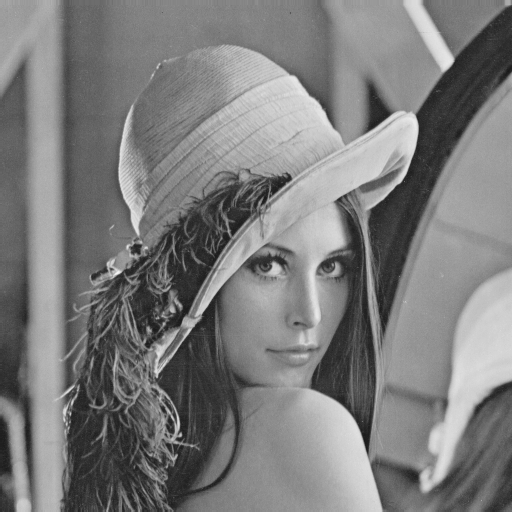

In [6]:
showImg(img)

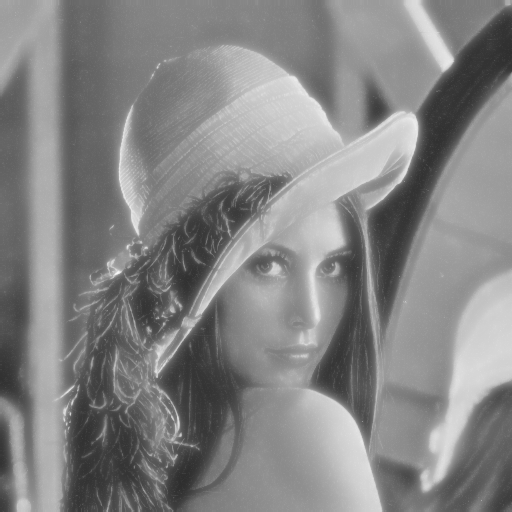

In [7]:
showImg(r_img)

In [8]:
size = 128
img = cv2.resize(img, (size, size))

In [9]:
cv2.imwrite(f'data/lena_gray_{size}.png', img)

True